In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

from pptoolbox.platform import preprocess, WAVELENGTHS_3NM_V1
from pptoolbox.preprocessing import SNV, MSC, SavitzkyGolay, Detrend
from pptoolbox.visualization import (plot_spectra, plot_loadings, plot_scree, fit_pca,
                                               generate_pc_df, plot_svp, initialize_theme,spectral_vector_properties)

from sklearn.feature_selection import f_classif, mutual_info_classif, chi2

# plotly.offline.init_notebook_mode()
# qualitative_cmap, diverging_cmap, light_cmap = initialize_theme()

# import data

In [4]:
datasets = {
    'full': {},
    'nondeo': {}
}

pulldate = "250218"

In [16]:
datafolder_path = Path ("../data/processed")

# lots should be cleaned and preprocessed

for dataset in datasets:

    cleaned_input = pd.read_csv(datafolder_path / f"cleaned_input_{dataset}_{pulldate}.csv", index_col=0)

    cleaned_label = pd.read_csv(datafolder_path / f"cleaned_label_{dataset}_{pulldate}.csv", index_col=0)

    datasets[dataset]['cleaned_input'] = cleaned_input
    datasets[dataset]['cleaned_label'] = cleaned_label

    print(f"Dataset: {dataset} has {cleaned_input.shape} spectra and {cleaned_label.shape} label")

Dataset: full has (3787, 191) spectra and (3787, 20) label
Dataset: nondeo has (2549, 191) spectra and (2549, 19) label


In [18]:
for dataset in datasets:
    print(f'Processing {dataset} dataset')
    label_df = datasets[dataset]['cleaned_label']

    param_label_map = {}

    for col in label_df.columns:
        if label_df[col].dtype == 'float64':
            param_label_map[col] = 'reg'
        elif label_df[col].dtype == 'object':
            param_label_map[col] = 'clf'

    datasets[dataset]["param_label_map"] = param_label_map

Processing full dataset
Processing nondeo dataset


In [19]:
for dataset in datasets:
    print(datasets[dataset]['param_label_map'])

{'Acetic': 'clf', 'Ash': 'clf', 'Astringent': 'clf', 'Bitter': 'clf', 'Brown Fruit': 'clf', 'Cacao (Chocolate)': 'clf', 'Carbon': 'clf', 'Deodorization Level': 'clf', 'Earthy': 'clf', 'Fishy': 'clf', 'Heated Fat (Oil)': 'clf', 'Musty': 'clf', 'Oxidized (Old Butter-Stale-Cardboard)': 'clf', 'Painty (Solvent-Chemical)': 'clf', 'Petroleum (Motor Oil-Rubber)': 'clf', 'Putrid': 'clf', 'Smoky': 'clf', 'Sour': 'clf', 'Straw (Hay)': 'clf', 'Sensory Value': 'reg'}
{'Acetic': 'clf', 'Ash': 'clf', 'Astringent': 'clf', 'Bitter': 'clf', 'Brown Fruit': 'clf', 'Cacao (Chocolate)': 'clf', 'Carbon': 'clf', 'Earthy': 'clf', 'Fishy': 'clf', 'Heated Fat (Oil)': 'clf', 'Musty': 'clf', 'Oxidized (Old Butter-Stale-Cardboard)': 'clf', 'Painty (Solvent-Chemical)': 'clf', 'Petroleum (Motor Oil-Rubber)': 'clf', 'Putrid': 'clf', 'Smoky': 'clf', 'Sour': 'clf', 'Straw (Hay)': 'clf', 'Sensory Value': 'reg'}


# filter data

In [20]:
# create a new dict selections to only have deo and nondeo datasets
selections = datasets.copy()

# No Preprocessing

In [ ]:
# PREPROCESSING = 'No Preprocessing'

In [ ]:
# for selection in selections:
#     print(f'\nProcessing {selection} dataset')
#     output_dir = Path(f"../data/visualisation/{selection}/{PREPROCESSING}")
#     output_dir.mkdir(exist_ok=True, parents=True)

#     SAMPLE_TYPE = f'{selection}'

#     selected_df = selections[selection]['cleaned_input']
#     selected_labels = selections[selection]['cleaned_label']
#     param_label_map = selections[selection]['param_label_map']
    
#     print(selected_df.shape, selected_labels.shape)

#     plot_df = selected_df.copy()

#     selections[selection]['plot_df'] = plot_df

#     for param, label_type in param_label_map.items():

#         # check if png exists
#         if (output_dir / f"{selection}_spectra_{param}.png").exists():
#             print(f"Skipping {selection} {param}")
#             continue

#         print(f'Generating figure for {param}')
#         plot_spectra(plot_df, labels=selected_labels[[param]],
#                     label_type=label_type,
#                     spec_prep=PREPROCESSING,
#                     sample_type=SAMPLE_TYPE,
#                     cmap=cmap)
        
#         plt.savefig(output_dir / f"{selection}_spectra_{param}.png", bbox_inches='tight')
#         # plt.show()
#         plt.close()

In [ ]:
# N_COMP = 0.99
# RANDOM_STATE = 42

# for selection in selections:

#     output_dir = Path(f"../data/visualisation/{selection}/{PREPROCESSING}")
#     output_dir.mkdir(exist_ok=True, parents=True)
    
#     SAMPLE_TYPE = f'{selection}'

#     plot_df = selections[selection]['plot_df']

#     fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)

#     selections[selection]['fitted_pc'] = fitted_pc
#     selections[selection]['pc_labels'] = pc_labels

#     fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
#                             spec_prep=PREPROCESSING, 
#                             sample_type=SAMPLE_TYPE)
    
#     plt.savefig(output_dir / f"{selection}_pca_loadings.png", bbox_inches='tight')
#     plt.show()
#     plt.close()

#     fig1, ax1 = plot_scree(fitted_pc,
#                         spec_prep=PREPROCESSING, 
#                         sample_type=SAMPLE_TYPE)
#     print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
#     Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

#     plt.savefig(output_dir / f"{selection}_scree_plot.png", bbox_inches='tight')
#     plt.show()
#     plt.close()

In [ ]:
# for selection in selections:
#     SAMPLE_TYPE = f'{selection}'
#     print(f'\nProcessing {selection} dataset')
#     output_dir = Path(f"../data/visualisation/{selection}/{PREPROCESSING}")
#     output_dir.mkdir(exist_ok=True, parents=True)
    
#     selected_df = selections[selection]['cleaned_input']
#     selected_labels = selections[selection]['cleaned_label']
#     param_label_map = selections[selection]['param_label_map']
#     plot_df = selections[selection]['plot_df']
#     fitted_pc = selections[selection]['fitted_pc']
#     pc_labels = selections[selection]['pc_labels']

#     print(plot_df.shape, selected_labels.shape)

#     for param in param_label_map.keys():
#         # check if png exists
#         if (output_dir / f"{selection}_pca_{param}.png").exists():
#             print(f"Skipping {selection} {param}")
#             continue

#         print(f'Generating figure for {param}')
#         pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=selected_labels[[param]])
#         sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
#         plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)

#         plt.savefig(output_dir / f"{selection}_pca_{param}.png", bbox_inches='tight')
#         # plt.show()
#         plt.close()

In [30]:
# fig = make_subplots(rows=3, cols= 2, 
#                     subplot_titles=['F Test Spectra', 'F Test PCA', 
#                                     'Mutual Info Spectra', 'Mutual Info PCA',
#                                     'Chi2 Spectra', 'Chi2 PCA'],
#                     specs=[[{'secondary_y': True}, {'secondary_y': True}],
#                            [{'secondary_y': False}, {'secondary_y': False}],
#                            [{'secondary_y': True}, {'secondary_y': True}]],
#                     horizontal_spacing=0.15,
#                     vertical_spacing=0.1)

# title = f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING}'
# colors = px.colors.qualitative.Plotly
# pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df)
# n_comp = fitted_pc.n_components_

# for i, param in enumerate(param_label_map.keys()):
#     try:
#         f_reg_spec = f_classif(plot_df, label_df[param].values.ravel())
#         f_reg_pca = f_classif(pc_df.iloc[:, :n_comp], pc_df[param].values.ravel())
#         mms = MinMaxScaler()
#         scaled_spec = mms.fit_transform(plot_df)
#         scaled_pca = mms.fit_transform(pc_df.iloc[:, :n_comp])
#         mi_spec = mutual_info_classif(scaled_spec, label_df[param].values.ravel())
#         mi_pca = mutual_info_classif(scaled_pca, pc_df[param].values.ravel())
#         chi2_spec = chi2(scaled_spec, label_df[param].values.ravel())
#         chi2_pca = chi2(scaled_pca, pc_df[param].values.ravel())
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=mi_spec, marker_color=colors[i], name=param,
#                        opacity=0.8, showlegend=False),
#                        secondary_y=False,row=2, col=1)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=mi_pca, name=param, marker_color=colors[i],
#                        showlegend=False, opacity=0.8),
#                     secondary_y=False, row=2, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=2)
        
#     except:
#         pass

# # Add figure title
# fig.update_layout(title_text=title, height=1400, width=1400)
# fig.update_xaxes(title_text="Wavelengths (nm)", col=1)
# fig.update_xaxes(title_text="No. of PCs", col=2)

# # Set y-axes titles
# fig.update_yaxes(title_text="F value", secondary_y=False, row=1)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=1)
# fig.update_yaxes(title_text="Mutual Information", secondary_y=False, row=2)
# fig.update_yaxes(title_text="Chi2", secondary_y=False, row=3)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=3)

# fig.show()

# SNV

In [21]:
# CONFIGS
PREPROCESSING = 'SNV'

In [22]:
for selection in selections:
    print(f'\nProcessing {selection} dataset')
    output_dir = Path(f"../data/visualisation/{selection}/{PREPROCESSING}")
    output_dir.mkdir(exist_ok=True, parents=True)

    SAMPLE_TYPE = f'{selection}'

    selected_df = selections[selection]['cleaned_input']
    selected_labels = selections[selection]['cleaned_label']
    param_label_map = selections[selection]['param_label_map']
    
    print(selected_df.shape, selected_labels.shape)

    snv_df = pd.DataFrame(SNV().fit_transform(selected_df), columns=selected_df.columns, index=selected_df.index)
    plot_df = snv_df.copy()

    selections[selection]['plot_df'] = plot_df

    for param, label_type in param_label_map.items():
        # check if png exists
        if (output_dir / f"{selection}_spectra_{param}.png").exists():
            print(f"Skipping {selection} {param}")
            continue
        
        print(f'Generating figure for {param}')
        plot_spectra(plot_df, labels=selected_labels[[param]],
                    label_type=label_type,
                    spec_prep=PREPROCESSING,
                    sample_type=SAMPLE_TYPE,
                    cmap=cmap)
        
        plt.savefig(output_dir / f"{selection}_spectra_{param}.png", bbox_inches='tight')
        # plt.show()
        plt.close()


Processing full dataset
(3787, 191) (3787, 20)
Generating figure for Acetic
Generating figure for Ash
Generating figure for Astringent
Generating figure for Bitter
Generating figure for Brown Fruit
Generating figure for Cacao (Chocolate)
Generating figure for Carbon
Generating figure for Deodorization Level
Generating figure for Earthy
Generating figure for Fishy
Generating figure for Heated Fat (Oil)
Generating figure for Musty
Generating figure for Oxidized (Old Butter-Stale-Cardboard)
Generating figure for Painty (Solvent-Chemical)
Generating figure for Petroleum (Motor Oil-Rubber)
Generating figure for Putrid
Generating figure for Smoky
Generating figure for Sour
Generating figure for Straw (Hay)
Generating figure for Sensory Value

Processing nondeo dataset
(2549, 191) (2549, 19)
Generating figure for Acetic
Generating figure for Ash
Generating figure for Astringent
Generating figure for Bitter
Generating figure for Brown Fruit
Generating figure for Cacao (Chocolate)
Generating f

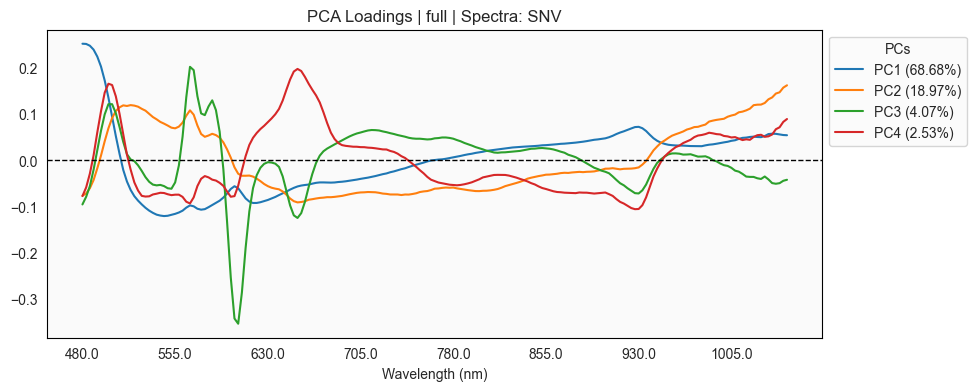

Total Explained Variance: 94.253% 
    Number of Components: 4


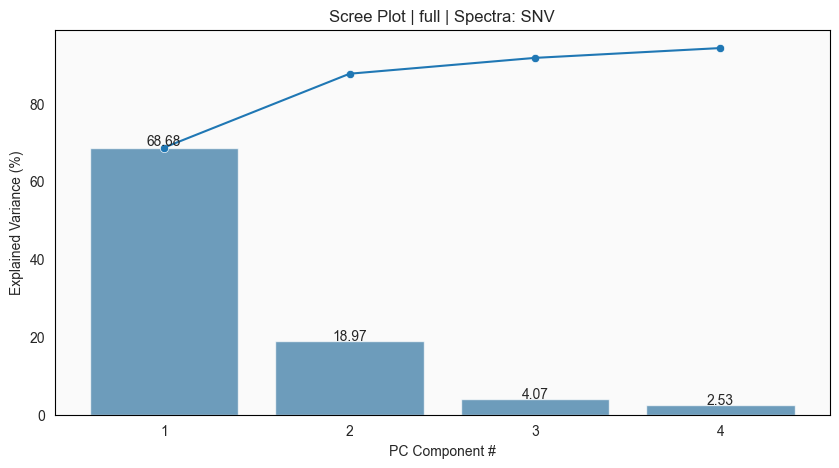

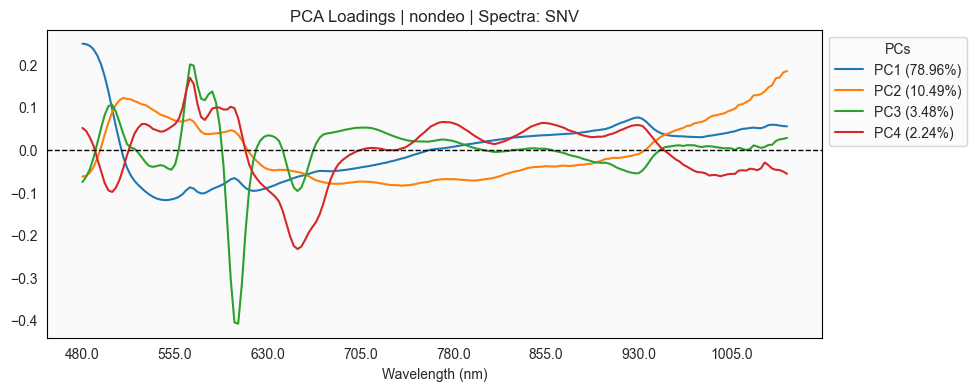

Total Explained Variance: 95.175% 
    Number of Components: 4


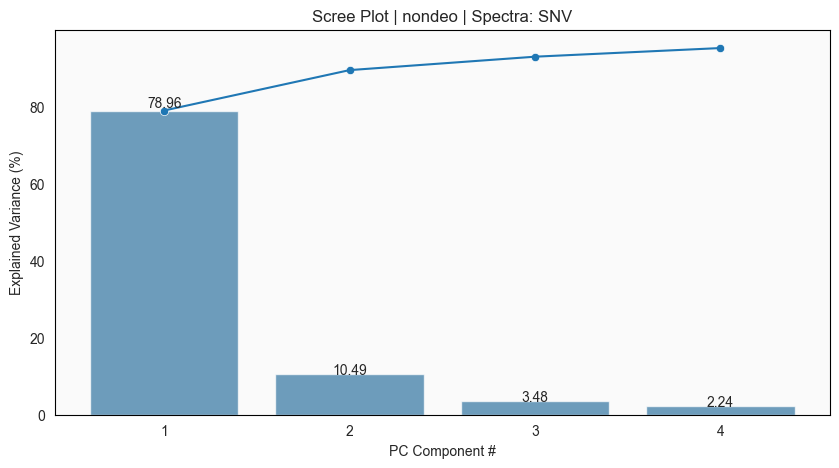

In [25]:
N_COMP = 0.93
RANDOM_STATE = 42

for selection in selections:

    output_dir = Path(f"../data/visualisation/{selection}/{PREPROCESSING}")
    output_dir.mkdir(exist_ok=True, parents=True)
    
    SAMPLE_TYPE = f'{selection}'

    plot_df = selections[selection]['plot_df']

    fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)

    selections[selection]['fitted_pc'] = fitted_pc
    selections[selection]['pc_labels'] = pc_labels

    fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
                            spec_prep=PREPROCESSING, 
                            sample_type=SAMPLE_TYPE)
    
    plt.savefig(output_dir / f"{selection}_pca_loadings.png", bbox_inches='tight')
    plt.show()
    plt.close()

    fig1, ax1 = plot_scree(fitted_pc,
                        spec_prep=PREPROCESSING, 
                        sample_type=SAMPLE_TYPE)
    print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
    Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

    plt.savefig(output_dir / f"{selection}_scree_plot.png", bbox_inches='tight')
    plt.show()
    plt.close()

In [26]:
for selection in selections:
    SAMPLE_TYPE = f'{selection}'
    print(f'\nProcessing {selection} dataset')
    output_dir = Path(f"../data/visualisation/{selection}/{PREPROCESSING}")
    output_dir.mkdir(exist_ok=True, parents=True)
    
    selected_df = selections[selection]['cleaned_input']
    selected_labels = selections[selection]['cleaned_label']
    param_label_map = selections[selection]['param_label_map']
    plot_df = selections[selection]['plot_df']
    fitted_pc = selections[selection]['fitted_pc']
    pc_labels = selections[selection]['pc_labels']

    print(plot_df.shape, selected_labels.shape)

    for param in param_label_map.keys():
        # check if png exists
        if (output_dir / f"{selection}_pca_{param}.png").exists():
            print(f"Skipping {selection} {param}")
            continue
        
        print(f'Generating figure for {param}')
        pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=selected_labels[[param]])
        sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
        plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)

        plt.savefig(output_dir / f"{selection}_pca_{param}.png", bbox_inches='tight')
        # plt.show()
        plt.close()


Processing full dataset
(3787, 191) (3787, 20)
Generating figure for Acetic


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Ash


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Astringent


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Bitter


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Brown Fruit


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Cacao (Chocolate)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Carbon


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Deodorization Level


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Earthy


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Fishy


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Heated Fat (Oil)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Musty


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Oxidized (Old Butter-Stale-Cardboard)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Painty (Solvent-Chemical)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Petroleum (Motor Oil-Rubber)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Putrid


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Smoky


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Sour


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Straw (Hay)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Sensory Value


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight




Processing nondeo dataset
(2549, 191) (2549, 19)
Generating figure for Acetic


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Ash


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Astringent


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Bitter


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Brown Fruit


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Cacao (Chocolate)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Carbon


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Earthy


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Fishy


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Heated Fat (Oil)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Musty


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Oxidized (Old Butter-Stale-Cardboard)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Painty (Solvent-Chemical)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Petroleum (Motor Oil-Rubber)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Putrid


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Smoky


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Sour


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Straw (Hay)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Sensory Value


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



In [121]:
# fig = make_subplots(rows=3, cols= 2, 
#                     subplot_titles=['F Test Spectra', 'F Test PCA', 
#                                     'Mutual Info Spectra', 'Mutual Info PCA',
#                                     'Chi2 Spectra', 'Chi2 PCA'],
#                     specs=[[{'secondary_y': True}, {'secondary_y': True}],
#                            [{'secondary_y': False}, {'secondary_y': False}],
#                            [{'secondary_y': True}, {'secondary_y': True}]],
#                     horizontal_spacing=0.15,
#                     vertical_spacing=0.1)

# title = f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING}'
# colors = px.colors.qualitative.Plotly
# pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df)
# n_comp = fitted_pc.n_components_

# for i, param in enumerate(param_label_map.keys()):
#     try:
#         f_reg_spec = f_classif(plot_df, label_df[param].values.ravel())
#         f_reg_pca = f_classif(pc_df.iloc[:, :n_comp], pc_df[param].values.ravel())
#         mms = MinMaxScaler()
#         scaled_spec = mms.fit_transform(plot_df)
#         scaled_pca = mms.fit_transform(pc_df.iloc[:, :n_comp])
#         mi_spec = mutual_info_classif(scaled_spec, label_df[param].values.ravel())
#         mi_pca = mutual_info_classif(scaled_pca, pc_df[param].values.ravel())
#         chi2_spec = chi2(scaled_spec, label_df[param].values.ravel())
#         chi2_pca = chi2(scaled_pca, pc_df[param].values.ravel())
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=mi_spec, marker_color=colors[i], name=param,
#                        opacity=0.8, showlegend=False),
#                        secondary_y=False,row=2, col=1)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=mi_pca, name=param, marker_color=colors[i],
#                        showlegend=False, opacity=0.8),
#                     secondary_y=False, row=2, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=2)
        
#     except:
#         pass

# # Add figure title
# fig.update_layout(title_text=title, height=1400, width=1400)
# fig.update_xaxes(title_text="Wavelengths (nm)", col=1)
# fig.update_xaxes(title_text="No. of PCs", col=2)

# # Set y-axes titles
# fig.update_yaxes(title_text="F value", secondary_y=False, row=1)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=1)
# fig.update_yaxes(title_text="Mutual Information", secondary_y=False, row=2)
# fig.update_yaxes(title_text="Chi2", secondary_y=False, row=3)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=3)

# fig.show()

# SG1D9W2P

In [27]:
# CONFIGS
PREPROCESSING = 'SG1D9W2P'

In [28]:
for selection in selections:
    print(f'\nProcessing {selection} dataset')
    output_dir = Path(f"../data/visualisation/{selection}/{PREPROCESSING}")
    output_dir.mkdir(exist_ok=True, parents=True)

    SAMPLE_TYPE = f'{selection}'

    selected_df = selections[selection]['cleaned_input']
    selected_labels = selections[selection]['cleaned_label']
    param_label_map = selections[selection]['param_label_map']
    
    print(selected_df.shape, selected_labels.shape)

    msc = SavitzkyGolay(deriv=1, window=9, polyorder=2)
    msc_df = pd.DataFrame(msc.fit_transform(selected_df), 
                        columns=selected_df.columns[4:-4], index=selected_df.index)
    plot_df = msc_df.copy()

    selections[selection]['plot_df'] = plot_df

    for param, label_type in param_label_map.items():
        # check if png exists
        if (output_dir / f"{selection}_spectra_{param}.png").exists():
            print(f"Skipping {selection} {param}")
            continue
        
        print(f'Generating figure for {param}')
        plot_spectra(plot_df, labels=selected_labels[[param]],
                    label_type=label_type,
                    spec_prep=PREPROCESSING,
                    sample_type=SAMPLE_TYPE,
                    cmap=cmap)
        
        plt.savefig(output_dir / f"{selection}_spectra_{param}.png", bbox_inches='tight')
        # plt.show()
        plt.close()


Processing full dataset
(3787, 191) (3787, 20)
Generating figure for Acetic
Generating figure for Ash
Generating figure for Astringent
Generating figure for Bitter
Generating figure for Brown Fruit
Generating figure for Cacao (Chocolate)
Generating figure for Carbon
Generating figure for Deodorization Level
Generating figure for Earthy
Generating figure for Fishy
Generating figure for Heated Fat (Oil)
Generating figure for Musty
Generating figure for Oxidized (Old Butter-Stale-Cardboard)
Generating figure for Painty (Solvent-Chemical)
Generating figure for Petroleum (Motor Oil-Rubber)
Generating figure for Putrid
Generating figure for Smoky
Generating figure for Sour
Generating figure for Straw (Hay)
Generating figure for Sensory Value

Processing nondeo dataset
(2549, 191) (2549, 19)
Generating figure for Acetic
Generating figure for Ash
Generating figure for Astringent
Generating figure for Bitter
Generating figure for Brown Fruit
Generating figure for Cacao (Chocolate)
Generating f

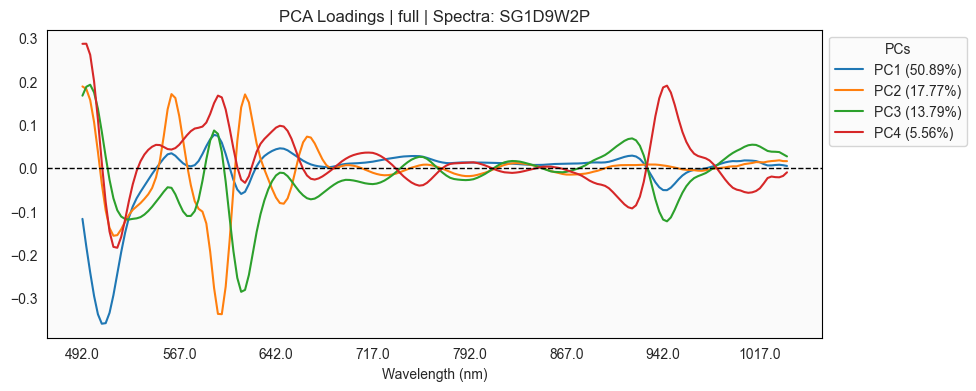

Total Explained Variance: 88.014% 
    Number of Components: 4


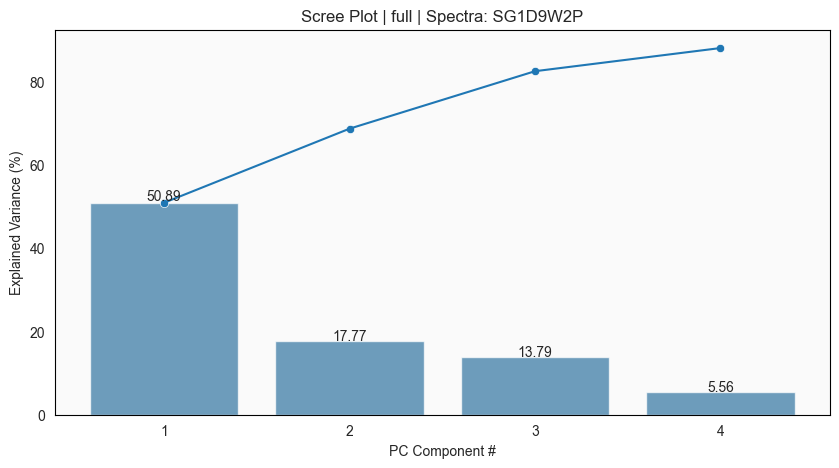

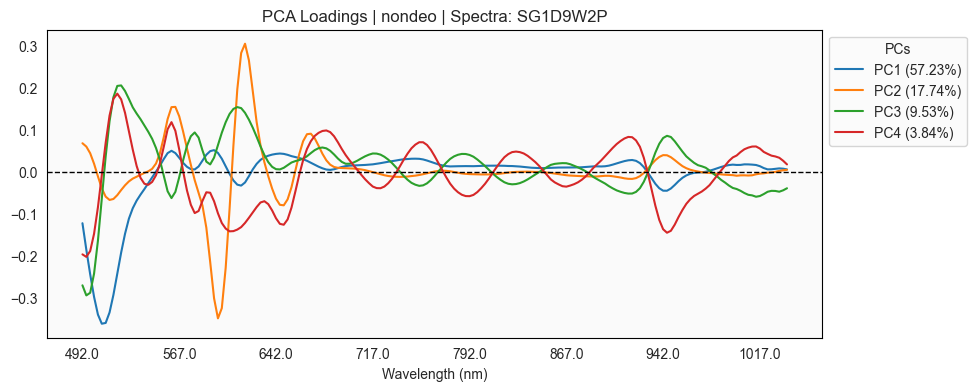

Total Explained Variance: 88.343% 
    Number of Components: 4


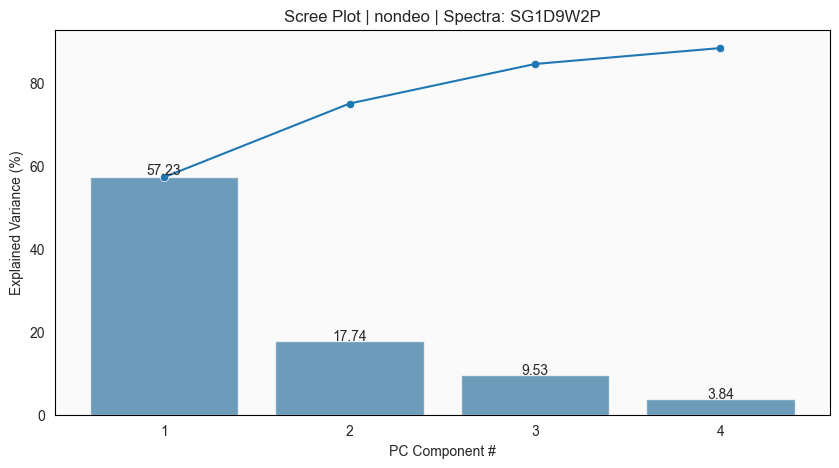

In [31]:
N_COMP = 0.88
RANDOM_STATE = 42

for selection in selections:

    output_dir = Path(f"../data/visualisation/{selection}/{PREPROCESSING}")
    output_dir.mkdir(exist_ok=True, parents=True)
    
    SAMPLE_TYPE = f'{selection}'

    plot_df = selections[selection]['plot_df']

    fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)

    selections[selection]['fitted_pc'] = fitted_pc
    selections[selection]['pc_labels'] = pc_labels

    fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
                            spec_prep=PREPROCESSING, 
                            sample_type=SAMPLE_TYPE)
    
    plt.savefig(output_dir / f"{selection}_pca_loadings.png", bbox_inches='tight')
    plt.show()
    plt.close()

    fig1, ax1 = plot_scree(fitted_pc,
                        spec_prep=PREPROCESSING, 
                        sample_type=SAMPLE_TYPE)
    print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
    Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

    plt.savefig(output_dir / f"{selection}_scree_plot.png", bbox_inches='tight')
    plt.show()
    plt.close()

In [32]:
for selection in selections:
    SAMPLE_TYPE = f'{selection}'
    print(f'\nProcessing {selection} dataset')
    output_dir = Path(f"../data/visualisation/{selection}/{PREPROCESSING}")
    output_dir.mkdir(exist_ok=True, parents=True)
    
    selected_df = selections[selection]['cleaned_input']
    selected_labels = selections[selection]['cleaned_label']
    param_label_map = selections[selection]['param_label_map']
    plot_df = selections[selection]['plot_df']
    fitted_pc = selections[selection]['fitted_pc']
    pc_labels = selections[selection]['pc_labels']

    print(plot_df.shape, selected_labels.shape)

    for param in param_label_map.keys():
        # check if png exists
        if (output_dir / f"{selection}_pca_{param}.png").exists():
            print(f"Skipping {selection} {param}")
            continue

        print(f'Generating figure for {param}')
        pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=selected_labels[[param]])
        sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
        plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)

        plt.savefig(output_dir / f"{selection}_pca_{param}.png", bbox_inches='tight')
        # plt.show()
        plt.close()


Processing full dataset
(3787, 183) (3787, 20)
Generating figure for Acetic


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Ash


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Astringent


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Bitter


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Brown Fruit


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Cacao (Chocolate)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Carbon


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Deodorization Level


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Earthy


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Fishy


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Heated Fat (Oil)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Musty


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Oxidized (Old Butter-Stale-Cardboard)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Painty (Solvent-Chemical)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Petroleum (Motor Oil-Rubber)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Putrid


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Smoky


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Sour


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Straw (Hay)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Sensory Value


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight




Processing nondeo dataset
(2549, 183) (2549, 19)
Generating figure for Acetic


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Ash


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Astringent


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Bitter


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Brown Fruit


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Cacao (Chocolate)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Carbon


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Earthy


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Fishy


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Heated Fat (Oil)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Musty


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Oxidized (Old Butter-Stale-Cardboard)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Painty (Solvent-Chemical)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Petroleum (Motor Oil-Rubber)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Putrid


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Smoky


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Sour


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Straw (Hay)


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Generating figure for Sensory Value


c:\Users\RyanSoh\miniconda3\envs\cargill\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



In [45]:
# fig = make_subplots(rows=3, cols= 2, 
#                     subplot_titles=['F Test Spectra', 'F Test PCA', 
#                                     'Mutual Info Spectra', 'Mutual Info PCA',
#                                     'Chi2 Spectra', 'Chi2 PCA'],
#                     specs=[[{'secondary_y': True}, {'secondary_y': True}],
#                            [{'secondary_y': False}, {'secondary_y': False}],
#                            [{'secondary_y': True}, {'secondary_y': True}]],
#                     horizontal_spacing=0.15,
#                     vertical_spacing=0.1)

# title = f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING}'
# colors = px.colors.qualitative.Plotly
# pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df)
# n_comp = fitted_pc.n_components_

# for i, param in enumerate(param_label_map.keys()):
#     try:
#         f_reg_spec = f_classif(plot_df, label_df[param].values.ravel())
#         f_reg_pca = f_classif(pc_df.iloc[:, :n_comp], pc_df[param].values.ravel())
#         mms = MinMaxScaler()
#         scaled_spec = mms.fit_transform(plot_df)
#         scaled_pca = mms.fit_transform(pc_df.iloc[:, :n_comp])
#         mi_spec = mutual_info_classif(scaled_spec, label_df[param].values.ravel())
#         mi_pca = mutual_info_classif(scaled_pca, pc_df[param].values.ravel())
#         chi2_spec = chi2(scaled_spec, label_df[param].values.ravel())
#         chi2_pca = chi2(scaled_pca, pc_df[param].values.ravel())
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=mi_spec, marker_color=colors[i], name=param,
#                        opacity=0.8, showlegend=False),
#                        secondary_y=False,row=2, col=1)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=mi_pca, name=param, marker_color=colors[i],
#                        showlegend=False, opacity=0.8),
#                     secondary_y=False, row=2, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=2)
        
#     except:
#         pass

# # Add figure title
# fig.update_layout(title_text=title, height=1400, width=1400)
# fig.update_xaxes(title_text="Wavelengths (nm)", col=1)
# fig.update_xaxes(title_text="No. of PCs", col=2)

# # Set y-axes titles
# fig.update_yaxes(title_text="F value", secondary_y=False, row=1)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=1)
# fig.update_yaxes(title_text="Mutual Information", secondary_y=False, row=2)
# fig.update_yaxes(title_text="Chi2", secondary_y=False, row=3)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=3)

# fig.show()

# SG2D9W2P

In [ ]:
# # CONFIGS
# PREPROCESSING = 'SG2D9W2P'
# spectra_meta = {}

In [ ]:
# for selection in selections:
#     SAMPLE_TYPE = f'{selection}'
    
#     for split in data_split:
#         key = f'{selection}_{split}'
#         if key in cleaned_spectra:
#             if split == 'spectra':
#                 selected_df = cleaned_spectra[key]
#             elif split == 'label':
#                 selected_labels = cleaned_spectra[key]
#             print(f'Assigned {key} to {split}_df')

#     msc = SavitzkyGolay(deriv=2, window=9, polyorder=2)
#     msc_df = pd.DataFrame(msc.fit_transform(selected_df), 
#                         columns=selected_df.columns[4:-4], index=selected_df.index)
#     plot_df = msc_df.copy()

#     spectra_meta = {
#         **spectra_meta,
#         f'{selection}_plot_df' : plot_df
#     }

#     for param, label_type in param_label_map.items():
#         plot_spectra(plot_df, labels=selected_labels[[param]],
#                     label_type=label_type,
#                     spec_prep=PREPROCESSING,
#                     sample_type=SAMPLE_TYPE,
#                     cmap=cmap)

In [ ]:
# N_COMP = 0.95
# RANDOM_STATE = 42

# for selection in selections:
#     SAMPLE_TYPE = f'{selection}'

#     plot_df = spectra_meta[f'{selection}_plot_df']

#     fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)

#     spectra_meta = {
#         **spectra_meta,
#         f'{selection}_fitted_pc' : fitted_pc,
#         f'{selection}_pc_labels' : pc_labels,
#         }

#     fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
#                             spec_prep=PREPROCESSING, 
#                             sample_type=SAMPLE_TYPE)
#     fig1, ax1 = plot_scree(fitted_pc,
#                         spec_prep=PREPROCESSING, 
#                         sample_type=SAMPLE_TYPE)
#     print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
#     Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

In [ ]:
# for selection in selections:
#     SAMPLE_TYPE = f'{selection}'

#     for split in data_split:
#         key = f'{selection}_{split}'
#         if key in cleaned_spectra:
#             if split == 'spectra':
#                 selected_df = cleaned_spectra[key]
#             elif split == 'label':
#                 selected_labels = cleaned_spectra[key]
#             print(f'Assigned {key} to {split}_df')
    
#     plot_df = spectra_meta[f'{selection}_plot_df']
#     fitted_pc = spectra_meta[f'{selection}_fitted_pc']
#     pc_labels = spectra_meta[f'{selection}_pc_labels']

#     for param in param_label_map.keys():
#         pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=selected_labels[[param]])
#         sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
#         plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)

In [ ]:
# fig = make_subplots(rows=3, cols= 2, 
#                     subplot_titles=['F Test Spectra', 'F Test PCA', 
#                                     'Mutual Info Spectra', 'Mutual Info PCA',
#                                     'Chi2 Spectra', 'Chi2 PCA'],
#                     specs=[[{'secondary_y': True}, {'secondary_y': True}],
#                            [{'secondary_y': False}, {'secondary_y': False}],
#                            [{'secondary_y': True}, {'secondary_y': True}]],
#                     horizontal_spacing=0.15,
#                     vertical_spacing=0.1)

# title = f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING}'
# colors = px.colors.qualitative.Plotly
# pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df)
# n_comp = fitted_pc.n_components_

# for i, param in enumerate(param_label_map.keys()):
#     try:
#         f_reg_spec = f_classif(plot_df, label_df[param].values.ravel())
#         f_reg_pca = f_classif(pc_df.iloc[:, :n_comp], pc_df[param].values.ravel())
#         mms = MinMaxScaler()
#         scaled_spec = mms.fit_transform(plot_df)
#         scaled_pca = mms.fit_transform(pc_df.iloc[:, :n_comp])
#         mi_spec = mutual_info_classif(scaled_spec, label_df[param].values.ravel())
#         mi_pca = mutual_info_classif(scaled_pca, pc_df[param].values.ravel())
#         chi2_spec = chi2(scaled_spec, label_df[param].values.ravel())
#         chi2_pca = chi2(scaled_pca, pc_df[param].values.ravel())
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=mi_spec, marker_color=colors[i], name=param,
#                        opacity=0.8, showlegend=False),
#                        secondary_y=False,row=2, col=1)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=mi_pca, name=param, marker_color=colors[i],
#                        showlegend=False, opacity=0.8),
#                     secondary_y=False, row=2, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=2)
        
#     except:
#         pass

# # Add figure title
# fig.update_layout(title_text=title, height=1400, width=1400)
# fig.update_xaxes(title_text="Wavelengths (nm)", col=1)
# fig.update_xaxes(title_text="No. of PCs", col=2)

# # Set y-axes titles
# fig.update_yaxes(title_text="F value", secondary_y=False, row=1)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=1)
# fig.update_yaxes(title_text="Mutual Information", secondary_y=False, row=2)
# fig.update_yaxes(title_text="Chi2", secondary_y=False, row=3)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=3)

# fig.show()